# <div style="text-align: center; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> Top2000 Músicas mais ouvidas no Spotify - 2000 a 2019</div>

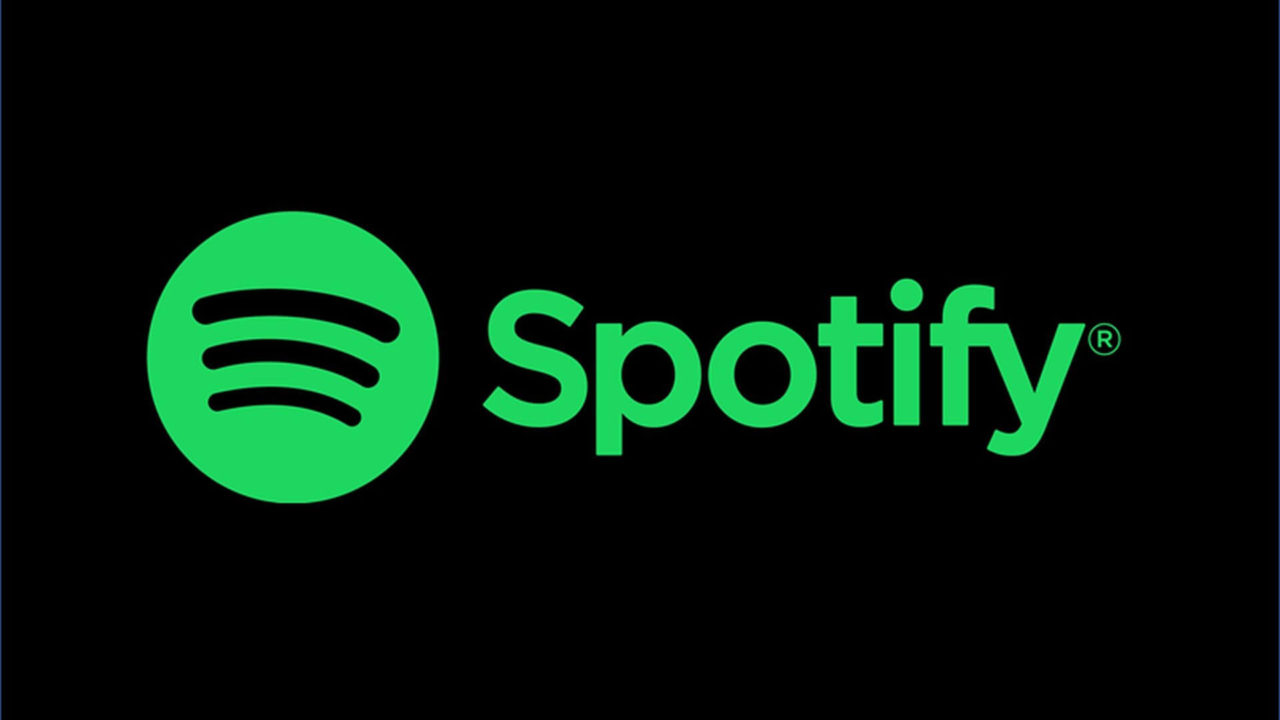

## <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">🖥 About YouTube</div>
```
Spotify é um serviço de streaming de música, podcast e vídeo que foi lançado oficialmente em 7 de outubro de 2008. É o serviço de streaming de música mais popular e usado do mundo. Ele é desenvolvido pela startup Spotify AB em Estocolmo, Suécia. 
``` 

[Fonte: Wikipedia](https://pt.wikipedia.org/wiki/Spotify)

## <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">📁 Sobre o Dataset<div>
Este dataset contém 19 colunas, sendo elas:
* (1)<b>artist</b>:           Name of the Artist
*  (2)<b>song</b>:      Name of the Track.
*  (3)<b>duration_ms</b>:   Duration of the track in milliseconds.
*  (4)<b>explicit</b>:   The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
*  (5)<b>year</b>:   Release Year of the track.
*  (6)<b>popularity</b>:      The higher the value the more popular the song is.
*  (7)<b>danceability</b>:       Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
*  (8)<b>energy</b>:           Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
*  (9)<b>key</b>:   The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
*  (10)<b>loudness</b>:  The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
*  (11)<b>mode</b>:   Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
*  (12)<b>speechiness</b>:      Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
*  (13)<b>acousticness</b>:       A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
*  (14)<b>instrumentalness</b>:           Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
*  (15)<b>liveness</b>:      Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
*  (16)<b>valence</b>:   A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
*  (17)<b>tempo</b>:   The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
*  (18)<b>genre</b>:   Genre of the track.

<a id="1"></a>
# <div style="text-align: center; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">1. Carregando Bibliotecas necessárias e Dataset</div>

<h4>Carregamento de bibliotecas necessárias e leitura do dataset</h4>

In [97]:
# data
import pandas as pd
import numpy as np


#For Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Set Option
pd.set_option("display.max_columns",None)
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})


df = pd.read_csv('../input/top-hits-spotify-from-20002019/songs_normalize.csv')

In [98]:
print('Número de linhas',df.shape[0],'\nNúmero de colunas =',df.shape[1])

<b>Nós podemos ver que 14 variáveis são numéricas e 4 variáveis são categóricas neste dataset.</b>

<a id="1.1"></a>
## <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">1.1. Convert type of columns</div>


<h4>Verificando valores ausentes ou nulos.</h4>

In [99]:
df.isnull().sum()

In [100]:
msno.matrix(df)
plt.title('Distribuição de valores ausentes', fontsize = 20);

<a id="2"></a>
# <div style="text-align: center; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">2. Explorar cada variável</div>

<h4> In this section, We'll explore each columns in this dataset to see the distributions of data.</h4>

<a id="2.1"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">2.1. As 10 músicas mais populares de cada ano</div>

In [101]:
# Função que auxilia na plotagem dos gráficos de barras
def musicas_populares_ano(year):
    df_year = df[df.year == year].sort_values(by='popularity',ascending=False).head(10)
    plt.figure(figsize=(20,5))
    sns.barplot(x=df_year.song, y=df_year.popularity).set_title('As 10 músicas mais populares do ano {}'.format(year),fontsize=15)
    plt.xticks(rotation=90)
    plt.xlabel('')
    return df_year

In [102]:
for year in sorted(df.year.unique()):
    df_year = musicas_populares_ano(year)

<b>Notamos que dentre as 10 músicas mais populares de cada um dos anos, o maior valor de popularidade só inferior a 80 nos anos: 1998, 2001 e 2020. Nos demais anos, o maior valor de popularidade sempre foi no mínimo igual a 80.</b>

<a id="2.2"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">2.2. Os 10 gêneros das 2000 músicas mais ouvidas ao longo dos anos - 2000 a 2019</div>

In [103]:
category = df['genre'].value_counts()[:10]
fig = px.pie(values=category.values, 
             names=category.index,
             color_discrete_sequence=px.colors.sequential.Peach)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')
fig.update_layout(title_text="Gênero Musical",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')
fig.show()

<b>"Pop", "hip pop, pop" e "hip hop, pop, R&B" são o top 3 de gêneros mais ouvidos.</b>

<a id="2.2"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">2.2. Os 10 artistas mais ouvidos dentre as 2000 músicas mais ouvidas ao longo dos anos - 2000 a 2019</div>

In [104]:
category = df['artist'].value_counts()[:10]
fig = px.pie(values=category.values, 
             names=category.index,
             color_discrete_sequence=px.colors.sequential.Peach)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')
fig.update_layout(title_text="Artistas",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')

fig.show()

<b>Rihanna, Drake e Eminem são o top 3 de artistas mais ouvidos neste dataset.</b>

<a id="2.3"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">2.3. Boxplot of Numerical Variables</div>

In [105]:
fig = make_subplots(rows=4, cols=3)

fig.update_layout(title_text="Boxplot of numerical variables",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')

fig.add_trace(go.Box(y=df.duration_ms,
                    name="duration_ms boxplot",
                    boxpoints='outliers'),row=1,col=1)

fig.add_trace(go.Box(y=df.popularity,
                     name="popularity boxplot",
                     boxpoints='outliers'),row=1,col=2)

fig.add_trace(go.Box(y=df.danceability,
                    name="danceability boxplot",
                    boxpoints='outliers'),row=1,col=3)

fig.add_trace(go.Box(y=df.energy,
                    name="energy boxplot",
                    boxpoints='outliers'),row=2,col=1)

fig.add_trace(go.Box(y=df.key,
                     name="key boxplot",
                     boxpoints='outliers'),row=2,col=2)

fig.add_trace(go.Box(y=df.loudness,
                    name="loudness boxplot",
                    boxpoints='outliers'),row=2,col=3)

fig.add_trace(go.Box(y=df.speechiness,
                     name="speechiness boxplot",
                     boxpoints='outliers'),row=3,col=1)

fig.add_trace(go.Box(y=df.acousticness,
                    name="acousticness boxplot",
                    boxpoints='outliers'),row=3,col=2)

fig.add_trace(go.Box(y=df.instrumentalness,
                    name="instrumentalness boxplot",
                    boxpoints='outliers'),row=3,col=3)

fig.add_trace(go.Box(y=df.liveness,
                     name="liveness boxplot",
                     boxpoints='outliers'),row=4,col=1)

fig.add_trace(go.Box(y=df.valence,
                    name="valence boxplot",
                    boxpoints='outliers'),row=4,col=2)

fig.add_trace(go.Box(y=df.tempo,
                    name="tempo boxplot",
                    boxpoints='outliers'),row=4,col=3)


<b> Através desses boxplot's podemos observar a distribuição dos dados para cada uma das variáveis, além disso identificamos os outliers.</b>

<a id="3"></a>
# <div style="text-align: center; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">3. Análise por Gênero Musical</div>

<h4> Nessa seção, analisaremos as features por gênero musical</h4>

<a id="3.1"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.1. Mean of duration_ms by genre</div>

In [106]:
categories = df.groupby('genre').mean().duration_ms.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.values,
                            color_discrete_sequence=px.colors.sequential.Peach,
                            title='Mean of duration_ms by genre',
                            text = np.round(categories.values/100000,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

<b>Podemos notar que os três gêneros musicais com maior duração média por música são: "easy listening", "Folk/Acoustic, rock", "hip hop, lath, Dance/Electronic".</b>

<a id="3.2"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.2. Mean of popularity by genre</div>

In [107]:
categories = df.groupby('genre').mean().popularity.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.values,
                            color_discrete_sequence=px.colors.sequential.Peach,
                            title='Mean of popularity by genre',
                            text = np.round(categories.values,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

<a id="3.3"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.3. Mean of danceability by genre</div>

In [108]:
df.head(1)

In [109]:
categories = df.groupby('genre').mean().danceability.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.values,
                            color_discrete_sequence=px.colors.sequential.Peach,
                            title='Mean of danceability by genre',
                            text = np.round(categories.values,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

<a id="3.4"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.4. Mean of energy by genre</div>

In [110]:
categories = df.groupby('genre').mean().energy.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.values,
                            color_discrete_sequence=px.colors.sequential.Peach,
                            title='Mean of energy by genre',
                            text = np.round(categories.values,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

<a id="3.5"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.5. Mean of loudness by genre</div>

In [111]:
categories = df.groupby('genre').mean().loudness.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.values,
                            color_discrete_sequence=px.colors.sequential.Peach,
                            title='Mean of loudness by genre',
                            text = np.round(categories.values,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

<a id="3.6"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.6. Mean of speechness by genre</div>

In [112]:
categories = df.groupby('genre').mean().speechiness.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.values,
                            color_discrete_sequence=px.colors.sequential.Peach,
                            title='Mean of speechiness by genre',
                            text = np.round(categories.values,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

<a id="3.1"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.1. Mean of acousticness by genre</div>

In [113]:
categories = df.groupby('genre').mean().acousticness.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.values,
                            color_discrete_sequence=px.colors.sequential.Peach,
                            title='Mean of acousticness by genre',
                            text = np.round(categories.values,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

<a id="3.7"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.7. Mean of instrumentalness by genre</div>

In [114]:
categories = df.groupby('genre').mean().instrumentalness.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.values,
                            color_discrete_sequence=px.colors.sequential.Peach,
                            title='Mean of instrumentalness by genre',
                            text = np.round(categories.values,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

<a id="3.8"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.8. Mean of liveness by genre</div>

In [115]:
categories = df.groupby('genre').mean().liveness.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.values,
                            color_discrete_sequence=px.colors.sequential.Peach,
                            title='Mean of liveness by genre',
                            text = np.round(categories.values,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

<a id="3.9"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.9. Mean of valence by genre</div>

In [116]:
categories = df.groupby('genre').mean().valence.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.values,
                            color_discrete_sequence=px.colors.sequential.Peach,
                            title='Mean of valence by genre',
                            text = np.round(categories.values,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

<a id="4.0"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">4.0. Mean of tempo by genre</div>

In [117]:
categories = df.groupby('genre').mean().tempo.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.values,
                            color_discrete_sequence=px.colors.sequential.Peach,
                            title='Mean of tempo in BPM by genre',
                            text = np.round(categories.values,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

<a id="4.1"></a>
##  <div style="text-align: left; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:10px">4.1. Quantidade de músicas por Tom</div>

In [118]:
categories = df.groupby('key').count().song.sort_values(ascending=False)
fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.values,
                            color_discrete_sequence=px.colors.sequential.Peach,
                            title='Quantidade de músicas por Tom',
                            text = np.round(categories.values,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

Notamos que a tonalidade de C#, Dó Sustenido, foi mais utilizada nas músicas do TOP 2000. 

<a id="4.2"></a>
### <b>4.2.Strip plots</b>

In [119]:
def stplot(data, xcol, ycol, huecol, axs, title):
    sns.stripplot(data = data, x = xcol, y = ycol, 
                  hue = huecol, edgecolor = 'red', ax = axs).set_title(title, fontsize = 20)
    axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [120]:
title1 = 'Explicit with Popularity'
title2 = 'Mode with Popularity'
fig, ((ax1),(ax2)) = plt.subplots(ncols=1,nrows=2)
fig.set_size_inches(20,10)
stplot(df,'explicit', 'popularity', 'explicit', ax1, title1)
stplot(df,'mode', 'popularity', 'mode', ax2, title2)
fig.tight_layout(pad=3.0)

**Insights**:

* Existem mais músicas não explícitas do que explícitas entretanto esse fator aparentemente não influencia na popularidade;
* A escala (maior ou menor) aparentemente não influencia na popularidade de uma música.


<a id="3.2.2"></a>
### <b>3.2.2. Scatter plot</b>

In [121]:
fig = px.scatter(df, x="duration_ms", y="popularity",
                 size="popularity", color="key",
                 log_x=True, size_max=30,
                 title="key with video duration_ms and popularity")

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = 'black'
fig.show()

Notamos que não uma relação clara entre popularidade e duração da música em milisegundos e o tom.

In [122]:
fig = px.scatter(df, x="danceability", y="energy",
                 size="energy", color="mode",
                 log_x=True, size_max=30,
                 title="mode with danceability and energy")


fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = 'black'
fig.show()

Notamos que existe uma certa relação entre "danceability" e "energy" entretanto não aparentou existir relação com "mode".

In [123]:
fig = px.scatter(df, x="danceability", y="tempo",
                 size="tempo", color="key",
                 log_x=True, size_max=30,
                 title="key with danceability and tempo")


fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = 'black'
fig.show()

Aparentemente existe uma relação entre as variáveis "danceability" e "tempo", apesar de não haver uma relação clara com o tom da música.

In [124]:
fig = px.scatter(df, x="acousticness", y="instrumentalness",
                 size="instrumentalness", color="key",
                 log_x=True, size_max=30,
                 title="key with acousticness and instrumentalness")


fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = 'black'
fig.show()

Notamos que existe uma certa relação entre "instrumentalness" e "acousticness", apesar de não haver uma relação clara com a tonalidade.

In [125]:
fig = px.scatter(df, x="liveness", y="valence",
                 size="valence", color="key",
                 log_x=True, size_max=30,
                 title="key with liveness and valence")


fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = 'black'
fig.show()

Não notamos uma relação clara entre as variáveis.

<a id="6"></a>
## <div style="text-align: center; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">6. Regplots</div>

In [126]:
fig, ((ax1,ax2,ax3)) = plt.subplots(ncols=3,nrows=1)
fig.set_size_inches(20,5)

sns.regplot(x=df.danceability,
                y=df.energy,
                ax=ax1).set_title('Danceability with energy');
sns.regplot(x=df.danceability,
                y=df.tempo,
                ax=ax2,
                color='blue').set_title('Danceability with tempo');
sns.regplot(x=df.acousticness,
                y=df.instrumentalness,
                ax=ax3,
                color='black').set_title('Acousticness with instrumentalness');

<b>Vamos ver o mapa de calor de correlação de pearson na seção seguinte</b>

<a id="7"></a>
## <div style="text-align: center; background-color: #000000; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">7. Correlation heatmap</div>

In [127]:
mask = np.array(df.corr())
mask[np.tril_indices_from(mask)] = False

# Visualizar a correlação entre cada variável utilizando a correlação de Pearson 
_ = plt.figure(figsize = (20,10))
res = sns.heatmap(df.corr(), mask=mask, vmax = 1, linewidths = 0.9, cmap = 'viridis',annot_kws={"size": 15},annot=True)
_ = plt.title('Pearson Correlation', fontsize = 20, pad = 15)
_ = res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
_ = res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)

<b> Notamos que há uma alta correlação positiva 0.65 entre "loudness" e "energy" e uma moderada correlação negativa -0.45 entre "acousticness" e "energy".</b> 

Para verificarmos essas relações plotaremos curvas de regressão linear.

In [128]:
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1)
fig.set_size_inches(20,5)

sns.regplot(x=df.loudness,
                y=df.energy,
                ax=ax1).set_title('Loudness with energy');
sns.regplot(x=df.acousticness,
                y=df.energy,
                ax=ax2,
                color='blue').set_title('Acousticness with energy');

<b> Notamos que o aumento na variável "loudness" é acompanhado pelo aumento em "energy" e que o aumento em "acousticness" é acompanhado pela redução na variável "energy".</b> 